# Analysis of Water Quality Data

## Step-1: Installing Packages

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [ ]:
pip install seaborn

In [ ]:
pip install sklearn

## Step-2: Importing the Packages

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

## Step-3: Data Acquisition and Basic Data Insights

In [39]:
path="TDS.csv"

In [40]:
df=pd.read_csv(path)
df.head()

,Sno,Temperature,AverageVoltage,Compensated_Voltage,TDS without Comp,TDS_Sensor,Meter-1 (Sachin Sir),Meter-2 (Aftab Sir),TDS _Meter,Unnamed: 9,SPCRC ( 130),Washroom Water(324),Himalaya (70),Distilled,Theoritical Value,Temp
0,1,50.0,0.201465,0.034249,82.0,55.0,81.0,94.0,89.0,14.535039,NaN,NaN,1.0,0.0,70.0,NaN
1,3,45.0,0.178095,0.035619,73.0,53.0,92.0,94.0,88.6,15.110395,NaN,NaN,NaN,NaN,NaN,NaN
2,4,42.0,0.163597,0.037181,67.0,51.0,87.0,89.0,88.6,15.765941,NaN,NaN,NaN,NaN,NaN,NaN
3,5,40.0,0.155311,0.038828,64.0,50.0,88.0,89.0,88.5,16.456301,NaN,NaN,NaN,NaN,NaN,NaN
4,6,38.0,0.147473,0.040965,61.0,49.0,87.0,89.0,88.0,17.351277,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.dtypes

Sno                       int64
Temperature             float64
AverageVoltage          float64
Compensated_Voltage     float64
TDS without Comp        float64
TDS_Sensor              float64
Meter-1 (Sachin Sir)    float64
Meter-2 (Aftab Sir)     float64
TDS _Meter              float64
Unnamed: 9              float64
SPCRC ( 130)            float64
Washroom Water(324)     float64
Himalaya (70)           float64
Distilled               float64
Theoritical Value       float64
Temp                    float64
dtype: object

In [42]:
df.describe(include="all")

,Sno,Temperature,AverageVoltage,Compensated_Voltage,TDS without Comp,TDS_Sensor,Meter-1 (Sachin Sir),Meter-2 (Aftab Sir),TDS _Meter,Unnamed: 9,SPCRC ( 130),Washroom Water(324),Himalaya (70),Distilled,Theoritical Value,Temp
count,251.000000,32.000000,32.000000,109.000000,43.000000,32.000000,32.000000,32.000000,115.000000,35.000000,0.0,0.0,1.0,1.0,1.0,0.0
mean,126.996016,37.218750,0.115402,0.011506,35.534884,38.593750,70.500000,71.343750,19.727826,15.147755,NaN,NaN,1.0,0.0,70.0,NaN
std,72.608567,7.938206,0.038882,0.020653,25.020324,9.510128,11.653603,12.769948,32.499008,8.925532,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,25.000000,0.034400,0.000000,0.000000,22.000000,49.000000,53.000000,0.000000,0.000000,NaN,NaN,1.0,0.0,70.0,NaN
25%,64.500000,30.000000,0.089853,0.000000,7.500000,31.500000,60.000000,58.000000,0.000000,9.712897,NaN,NaN,1.0,0.0,70.0,NaN
50%,127.000000,38.000000,0.115641,0.000000,40.000000,39.000000,67.000000,70.500000,0.000000,14.158684,NaN,NaN,1.0,0.0,70.0,NaN
75%,189.500000,42.750000,0.139680,0.021978,52.500000,46.250000,80.250000,81.250000,55.750000,18.516393,NaN,NaN,1.0,0.0,70.0,NaN
max,252.000000,50.000000,0.201465,0.107179,82.000000,55.000000,92.000000,94.000000,89.000000,44.559660,NaN,NaN,1.0,0.0,70.0,NaN


## Step-4: Data Wrangling

In [56]:
df=df.head(32)

In [57]:
df[["Temperature"]]=df[["Temperature"]]/df[["Temperature"]].max()

In [58]:
df.head()

,Sno,Temperature,AverageVoltage,Compensated_Voltage,TDS without Comp,TDS_Sensor,Meter-1 (Sachin Sir),Meter-2 (Aftab Sir),TDS _Meter,Unnamed: 9,SPCRC ( 130),Washroom Water(324),Himalaya (70),Distilled,Theoritical Value,Temp
0,1,1.00,0.201465,0.034249,82.0,55.0,81.0,94.0,89.0,14.535039,NaN,NaN,1.0,0.0,70.0,NaN
1,3,0.90,0.178095,0.035619,73.0,53.0,92.0,94.0,88.6,15.110395,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0.84,0.163597,0.037181,67.0,51.0,87.0,89.0,88.6,15.765941,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0.80,0.155311,0.038828,64.0,50.0,88.0,89.0,88.5,16.456301,NaN,NaN,NaN,NaN,NaN,NaN
4,6,0.76,0.147473,0.040965,61.0,49.0,87.0,89.0,88.0,17.351277,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
Z=df[["Temperature","AverageVoltage"]]

In [127]:
Y=df[["TDS _Meter"]]

In [182]:
Z_train, Z_test,Y_train, Y_test= train_test_split(Z,Y,test_size=0.2,random_state=0)
#df1=df.head(11)
#df2=df.tail(11)
#Z_train=df1[["Temperature","AverageVoltage"]]
#Z_test=df2[["Temperature","AverageVoltage"]]
#Y_train=df1[["TDS _Meter"]]
#Y_test=df2[["TDS _Meter"]]

## Step-5: Multiple Linear Regression

In [183]:
lm=LinearRegression()

In [184]:
lm.fit(Z_train,Y_train)

LinearRegression()

In [185]:
Yhat=lm.predict(Z_test)

In [186]:
Yhat

array([[80.89677698],
       [63.34787326],
       [82.04905268],
       [85.61104088],
       [70.53060177],
       [73.86597056],
       [57.75809317]])

### Distribution Plot

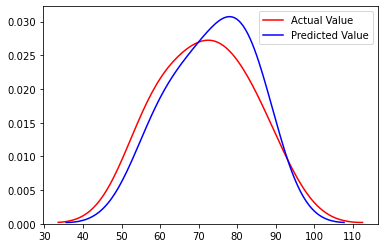

In [187]:
ax1=sns.distplot(Y_test,hist=False,color="r",label="Actual Value")
sns.distplot(Yhat,hist=False,color="b",label="Predicted Value",ax=ax1)


In [188]:
r2_score(Y_test,Yhat)

0.8870510404616742

In [189]:
mse=mean_squared_error(Y_test,Yhat)
mse

12.64696415193055

In [190]:
lm.coef_

array([[-39.26363072, 375.45793173]])

In [191]:
lm.intercept_

array([57.16869942])

## Step-6: Polynomial  Linear Regression

### A. Degree=2:

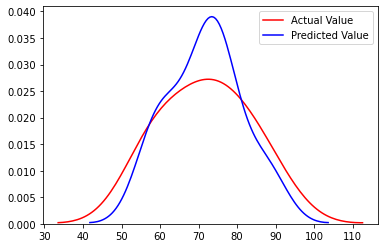

In [192]:
pr=PolynomialFeatures(degree=2,include_bias=False)
X_poly=pr.fit_transform(Z_train)
lm1=LinearRegression()
lm1.fit(X_poly,Y_train)
X_test=pr.fit_transform(Z_test)
Yhat1=lm1.predict(X_test)
ax1=sns.distplot(Y_test,hist=False,color="r",label="Actual Value")
sns.distplot(Yhat1,hist=False,color="b",label="Predicted Value",ax=ax1)


In [193]:
r2_score(Y_test,Yhat1)

0.9306548906423715

In [194]:
lm1.intercept_

array([18.58425967])

In [195]:
lm1.coef_

array([[   42.50158199,   531.31583067,    24.86230504, -1100.39587967,
         2980.48856494]])

### B. Degree=3:

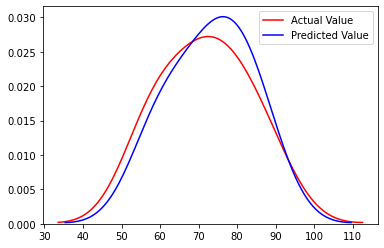

In [196]:
pr=PolynomialFeatures(degree=3,include_bias=False)
X_poly=pr.fit_transform(Z_train)
lm2=LinearRegression()
lm2.fit(X_poly,Y_train)
X_test=pr.fit_transform(Z_test)
Yhat2=lm2.predict(X_test)
ax1=sns.distplot(Y_test,hist=False,color="r",label="Actual Value")
sns.distplot(Yhat2,hist=False,color="b",label="Predicted Value",ax=ax1)


In [197]:
r2_score(Y_test,Yhat2)

0.9207751465798905

In [198]:
lm2.intercept_

array([-60.36327428])

In [199]:
lm2.coef_

array([[   497.18149904,   -208.72116613,   -690.67728054,
          -247.73289735,   7129.48584791,    389.54439264,
         -1395.74863532,   6856.5735122 , -29418.60294554]])

### Degree=4: 

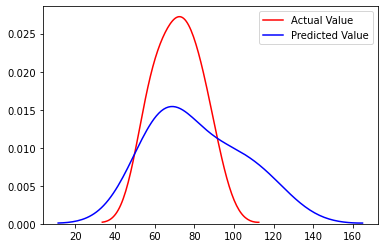

In [204]:
pr=PolynomialFeatures(degree=4,include_bias=False)
X_poly=pr.fit_transform(Z_train)
lm3=LinearRegression()
lm3.fit(X_poly,Y_train)
X_poly=pr.fit_transform(Z_test)
Yhat3=lm3.predict(X_poly)
ax1=sns.distplot(Y_test,hist=False,color="r",label="Actual Value")
sns.distplot(Yhat3,hist=False,color="b",label="Predicted Value",ax=ax1)


In [205]:
r2_score(Y_test,Yhat3)

-1.700545322497458

In [202]:
lm3.intercept_

array([654.34070268])

In [203]:
lm3.coef_

array([[-4.87340227e+03,  5.72411973e+03,  1.50810989e+04,
        -4.47479792e+04,  6.48617506e+04, -2.60634949e+04,
         2.05867954e+05, -8.91193563e+05,  1.46864529e+06,
         1.85904518e+04, -2.09985615e+05,  8.22315576e+05,
         3.04481535e+05, -5.42949813e+06]])